In [10]:
## Image clasifcation ptactice notebook 

In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
(X_train, y_train), (X_test, y_test) =datasets.cifar10.load_data()

170498071/170498071 [==============================] - 873s 5us/step


In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
y_test.shape

(10000, 1)

In [15]:
y_train.shape

(50000, 1)

In [21]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [27]:
def plot_sample(X, y, index):
    plt.figure(figsize = (1,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

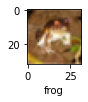

In [28]:
plot_sample(X_train, y_train, 0)

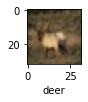

In [30]:
plot_sample(X_train, y_train, 3)

In [31]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [56]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
 
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [57]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
history= cnn.fit(X_train, y_train, epochs=20,  validation_data = (X_test, y_test)) 

Epoch 1/20
1563/1563 [==============================] - 183s 112ms/step - loss: 1.2841 - accuracy: 0.5398 - val_loss: 1.0839 - val_accuracy: 0.6177
Epoch 2/20
1563/1563 [==============================] - 133s 85ms/step - loss: 1.0725 - accuracy: 0.6198 - val_loss: 0.9522 - val_accuracy: 0.6692
Epoch 3/20
1563/1563 [==============================] - 141s 90ms/step - loss: 0.9540 - accuracy: 0.6661 - val_loss: 0.9294 - val_accuracy: 0.6804
Epoch 4/20
1563/1563 [==============================] - 152s 98ms/step - loss: 0.8768 - accuracy: 0.6929 - val_loss: 0.8553 - val_accuracy: 0.6986
Epoch 5/20
1563/1563 [==============================] - 139s 89ms/step - loss: 0.8188 - accuracy: 0.7142 - val_loss: 0.8128 - val_accuracy: 0.7147
Epoch 6/20
1563/1563 [==============================] - 134s 86ms/step - loss: 0.7688 - accuracy: 0.7307 - val_loss: 0.8122 - val_accuracy: 0.7173
Epoch 7/20
1563/1563 [==============================] - 137s 88ms/step - loss: 0.7255 - accuracy: 0.7448 - val_loss: 

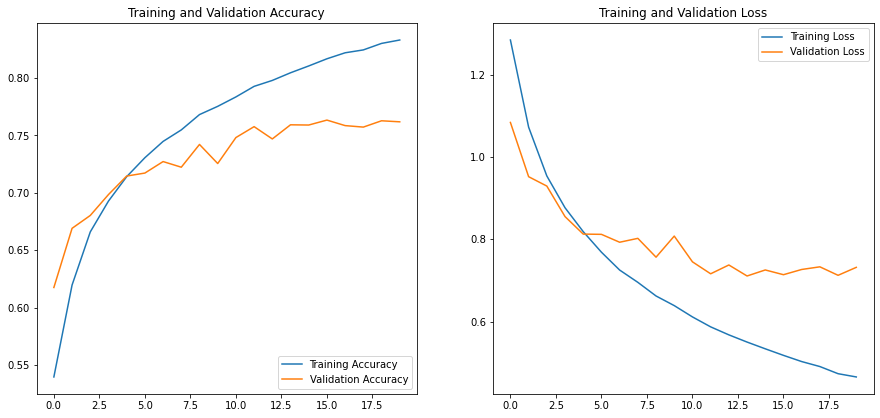

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)


plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [61]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 11s 32ms/step - loss: 0.7320 - accuracy: 0.7619


[0.7320455312728882, 0.761900007724762]

In [62]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 19s 53ms/step


array([[1.04327975e-02, 5.61214809e-04, 1.66501328e-02, 7.64966786e-01,
        6.57568278e-04, 1.33031800e-01, 1.68577358e-02, 2.14225277e-02,
        1.89410187e-02, 1.64784323e-02],
       [2.82585475e-04, 8.43498111e-03, 6.08444068e-08, 1.93015914e-08,
        4.51192106e-09, 2.12605003e-10, 2.57985322e-09, 2.75361123e-11,
        9.91002142e-01, 2.80181121e-04],
       [2.02723980e-01, 2.30834028e-03, 2.60905872e-05, 6.69201254e-05,
        4.10066605e-05, 4.39527139e-05, 7.74201283e-07, 2.26064985e-05,
        7.88881898e-01, 5.88443503e-03],
       [9.35496449e-01, 6.25047134e-04, 5.54302940e-03, 5.24448464e-04,
        2.19330803e-04, 2.18929767e-06, 3.62710011e-07, 1.03762895e-05,
        5.38193397e-02, 3.75934085e-03],
       [3.91822468e-08, 8.17839748e-07, 1.26371428e-01, 1.59983411e-02,
        6.20920122e-01, 5.36946580e-04, 2.36166984e-01, 2.43846284e-06,
        1.58925059e-06, 1.24463406e-06]], dtype=float32)

In [63]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [64]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

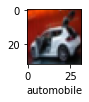

In [65]:
plot_sample(X_test, y_test,6)

In [66]:
classes[y_classes[6]]

'automobile'

In [67]:
classes[y_classes[3]]

'airplane'

In [49]:
from IPython import display
aa = display.Image("E:\Python project\dog.jpg")

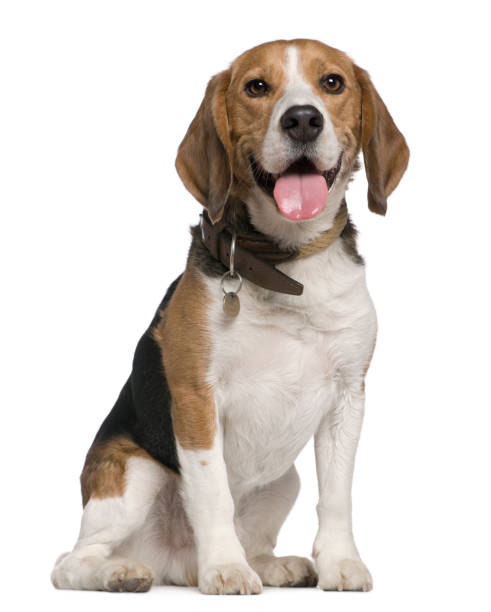

In [53]:
aa

In [69]:
from keras.preprocessing.image import load_img

ImportError: cannot import name 'load_img' from 'keras.preprocessing.image' (C:\Users\Sudhir\AppData\Roaming\Python\Python39\site-packages\keras\preprocessing\image.py)

In [70]:
from keras.models import load_model
 
#model = load_model('model_saved.h5')
 
image = load_img('v_data/test/planes/5.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0

NameError: name 'load_img' is not defined